In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00])
y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
sigma = 0.3
N = len(x)

In [3]:
Sx  = x.sum()
Sy  = y.sum()
Sxx = np.dot(x, x)
Sxy = np.dot(x, y)

In [4]:
Delta = N * Sxx - Sx**2

In [5]:
a2 = (N * Sxy - Sx * Sy) / Delta
a1 = (Sxx * Sy - Sx * Sxy) / Delta

In [6]:
var_a1 = sigma**2 * Sxx / Delta
var_a2 = sigma**2 * N   / Delta
cov_a1_a2 = -sigma**2 * Sx / Delta

In [7]:
da1 = np.sqrt(var_a1)
da2 = np.sqrt(var_a2)

In [8]:
print(f"a₁ = {a1:.3f} ± {da1:.3f}")
print(f"a₂ = {a2:.3f} ± {da2:.3f}")
print(f"Cov(a₁, a₂) = {cov_a1_a2:.3f}")

a₁ = 1.452 ± 0.721
a₂ = 0.799 ± 0.286
Cov(a₁, a₂) = -0.205


In [9]:
x_line = np.linspace(0, 5, 100)
y_line = a1 + a2 * x_line

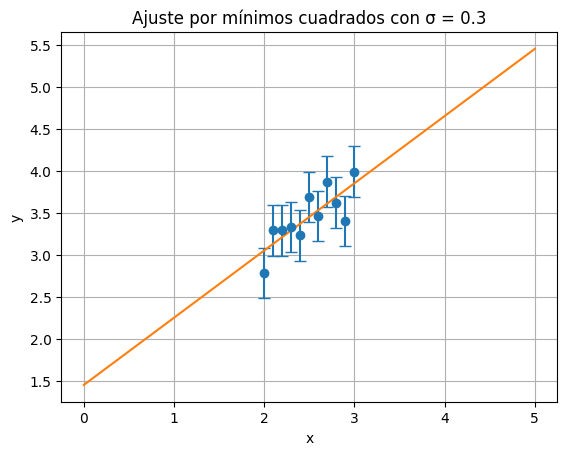

In [10]:
plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=4)
plt.plot(x_line, y_line)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados con σ = 0.3")
plt.grid(True)
plt.show()